# SMDM Project Notebook


Importing all the necessary packages for the Project

In [94]:
import pandas as pd 
import numpy as np 
import seaborn as sns  
import matplotlib.pyplot as plt 
sns.set(color_codes=True)
%matplotlib inline 
import matplotlib.patches as mpatches
import math
import statsmodels.api as sm
from scipy import stats
from scipy.stats import ttest_ind
from scipy.stats import ttest_1samp
from scipy.stats import ttest_rel
from scipy.stats import norm
from fractions import Fraction 
from pandas_profiling import ProfileReport
from scipy.stats import shapiro
from scipy.stats import mannwhitneyu
from scipy.stats import wilcoxon
from scipy.stats import variation
from statistics import variance 
from scipy.stats import describe

# Problem 1 Solutions

Data Loading and Exploration:

In [2]:
df_wc = pd.read_csv('Wholesale_Customer.csv')

Data Profiling:

In [3]:
ProfileReport(df_wc)

C:\Users\z024333\Documents\Anaconda_GreatLearning\lib\site-packages\pandas_profiling\describe.py:392: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  variable_stats = pd.concat(ldesc, join_axes=pd.Index([names]), axis=1)


Number of variables,9
Number of observations,440
Total Missing (%),0.0%
Total size in memory,31.1 KiB
Average record size in memory,72.3 B
Numeric,6
Categorical,2
Boolean,0
Date,0
Text (Unique),0
Rejected,1


In [4]:
#To Know amount more about Datatype, count and Null Property
df_wc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 9 columns):
Buyer/Spender       440 non-null int64
Channel             440 non-null object
Region              440 non-null object
Fresh               440 non-null int64
Milk                440 non-null int64
Grocery             440 non-null int64
Frozen              440 non-null int64
Detergents_Paper    440 non-null int64
Delicatessen        440 non-null int64
dtypes: int64(7), object(2)
memory usage: 31.1+ KB


In [5]:
#Null count info in all the columns
df_wc.isnull().sum()

Buyer/Spender       0
Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicatessen        0
dtype: int64

In [6]:
#Gives info on all the columns
df_wc.describe(include='all')

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440,440,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
unique,NaN,2,3,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Hotel,Other,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,298,316,NaN,NaN,NaN,NaN,NaN,NaN
mean,220.500000,NaN,NaN,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,127.161315,NaN,NaN,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,NaN,NaN,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,110.750000,NaN,NaN,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,220.500000,NaN,NaN,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,330.250000,NaN,NaN,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000


In [7]:
#Gives info on shape of the Dataset(rows and columns)
df_wc.shape

(440, 9)

1.1. Use methods of descriptive statistics to summarize data. Which Region and which Channel seems to spend more? Which Region and which Channel seems to spend less?

In [8]:
#df_wc_Region_specific gives the dataframe with last Column Total_Spent as sum of all items for all Regions
df_wc_Region_specific = pd.DataFrame(df_wc.groupby(['Region'])['Milk','Fresh','Grocery','Frozen','Detergents_Paper','Delicatessen'].sum().reset_index())
df_wc_Region_specific['Total_spent']= df_wc_Region_specific.iloc[:, :].sum(axis=1)
df_wc_Region_specific

,Region,Milk,Fresh,Grocery,Frozen,Detergents_Paper,Delicatessen,Total_spent
0,Lisbon,422454,854833,570037,231026,204136,104327,2386813
1,Oporto,239144,464721,433274,190132,173311,54506,1555088
2,Other,1888759,3960577,2495251,930492,890410,512110,10677599


In [9]:
#df_wc_Channel_specific gives the dataframe with last Column Total_Spent as sum of all items for all Channels
df_wc_Channel_specific = pd.DataFrame(df_wc.groupby(['Channel'])['Milk','Fresh','Grocery','Frozen','Detergents_Paper','Delicatessen'].sum().reset_index())
df_wc_Channel_specific['Total_spent']= df_wc_Channel_specific.iloc[:, :].sum(axis=1)
df_wc_Channel_specific

,Channel,Milk,Fresh,Grocery,Frozen,Detergents_Paper,Delicatessen,Total_spent
0,Hotel,1028614,4015717,1180717,1116979,235587,421955,7999569
1,Retail,1521743,1264414,2317845,234671,1032270,248988,6619931


In [10]:
df_wc_channel=df_wc[['Channel','Milk','Fresh','Grocery','Frozen','Detergents_Paper','Delicatessen']]
df_wc_region=df_wc[['Region','Milk','Fresh','Grocery','Frozen','Detergents_Paper','Delicatessen']]

In [11]:
#df_wc_region_on_average gives the dataframe with average money spent on all items for all Regions
df_wc_region_on_average = df_wc_region.groupby(['Region']).mean().reset_index()
df_wc_region_on_average

,Region,Milk,Fresh,Grocery,Frozen,Detergents_Paper,Delicatessen
0,Lisbon,5486.415584,11101.727273,7403.077922,3000.337662,2651.116883,1354.896104
1,Oporto,5088.170213,9887.680851,9218.595745,4045.361702,3687.468085,1159.702128
2,Other,5977.085443,12533.471519,7896.363924,2944.594937,2817.753165,1620.601266


In [12]:
#df_wc_channel_on_average gives the dataframe with average money spent on all items for all Channels
df_wc_channel_on_average = df_wc_channel.groupby(['Channel']).mean().reset_index()
df_wc_channel_on_average

,Channel,Milk,Fresh,Grocery,Frozen,Detergents_Paper,Delicatessen
0,Hotel,3451.724832,13475.560403,3962.137584,3748.251678,790.560403,1415.956376
1,Retail,10716.500000,8904.323944,16322.852113,1652.612676,7269.507042,1753.436620


1.2. There are 6 different varieties of items are considered. Do all varieties show similar behaviour across Region and Channel?

In [13]:
#df_wc_channel_skew gives skewness information on all channels based on items
df_wc_channel_skew = df_wc_channel.groupby(['Channel']).skew().reset_index()
df_wc_channel_skew

,Channel,Milk,Fresh,Grocery,Frozen,Detergents_Paper,Delicatessen
0,Hotel,4.660186,2.512084,2.118316,5.211448,2.857124,11.521808
1,Retail,3.413169,1.593948,2.980945,2.526896,2.612425,3.772841


In [14]:
#df_wc_region_skew gives skewness information on all Regions based on items
df_wc_region_skew = df_wc_region.groupby(['Region']).skew().reset_index()
df_wc_region_skew

,Region,Milk,Fresh,Grocery,Frozen,Detergents_Paper,Delicatessen
0,Lisbon,1.923527,2.013077,2.023387,2.334571,2.359030,2.050233
1,Oporto,1.803677,0.979873,3.637678,5.492402,3.620133,2.152210
2,Other,4.250869,2.617896,3.839176,3.963391,3.705302,10.214896


In [15]:
#stats_channel_hotel gives broader info on particularly items involving the channel called Hotel(with skewness information)
df_wc_channel_hotel = df_wc_channel.loc[df_wc_channel['Channel'] == "Hotel"]
stats_channel_hotel = df_wc_channel_hotel.describe()
stats_channel_hotel.loc['skew'] = df_wc_channel_hotel.skew().tolist()
stats_channel_hotel

,Milk,Fresh,Grocery,Frozen,Detergents_Paper,Delicatessen
count,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000
mean,3451.724832,13475.560403,3962.137584,3748.251678,790.560403,1415.956376
std,4352.165571,13831.687502,3545.513391,5643.912500,1104.093673,3147.426922
min,55.000000,3.000000,3.000000,25.000000,3.000000,3.000000
25%,1164.500000,4070.250000,1703.750000,830.000000,183.250000,379.000000
50%,2157.000000,9581.500000,2684.000000,2057.500000,385.500000,821.000000
75%,4029.500000,18274.750000,5076.750000,4558.750000,899.500000,1548.000000
max,43950.000000,112151.000000,21042.000000,60869.000000,6907.000000,47943.000000
skew,4.660186,2.512084,2.118316,5.211448,2.857124,11.521808


In [16]:
#stats_channel_retail gives broader info on particularly items involving the channel called Retail(with skewness information)
df_wc_channel_retail = df_wc_channel.loc[df_wc_channel['Channel'] == "Retail"]
stats_channel_retail = df_wc_channel_retail.describe()
stats_channel_retail.loc['skew'] = df_wc_channel_retail.skew().tolist()
stats_channel_retail

,Milk,Fresh,Grocery,Frozen,Detergents_Paper,Delicatessen
count,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000
mean,10716.500000,8904.323944,16322.852113,1652.612676,7269.507042,1753.436620
std,9679.631351,8987.714750,12267.318094,1812.803662,6291.089697,1953.797047
min,928.000000,18.000000,2743.000000,33.000000,332.000000,3.000000
25%,5938.000000,2347.750000,9245.250000,534.250000,3683.500000,566.750000
50%,7812.000000,5993.500000,12390.000000,1081.000000,5614.500000,1350.000000
75%,12162.750000,12229.750000,20183.500000,2146.750000,8662.500000,2156.000000
max,73498.000000,44466.000000,92780.000000,11559.000000,40827.000000,16523.000000
skew,3.413169,1.593948,2.980945,2.526896,2.612425,3.772841


In [17]:
#stats_region_lisbon gives broader info on particularly items involving the Region called Lisbon(with skewness information)
df_wc_region_lisbon = df_wc_region.loc[df_wc_region['Region'] == "Lisbon"]
stats_region_lisbon = df_wc_region_lisbon.describe()
stats_region_lisbon.loc['skew'] = df_wc_region_lisbon.skew().tolist()
stats_region_lisbon

,Milk,Fresh,Grocery,Frozen,Detergents_Paper,Delicatessen
count,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000
mean,5486.415584,11101.727273,7403.077922,3000.337662,2651.116883,1354.896104
std,5704.856079,11557.438575,8496.287728,3092.143894,4208.462708,1345.423340
min,258.000000,18.000000,489.000000,61.000000,5.000000,7.000000
25%,1372.000000,2806.000000,2046.000000,950.000000,284.000000,548.000000
50%,3748.000000,7363.000000,3838.000000,1801.000000,737.000000,806.000000
75%,7503.000000,15218.000000,9490.000000,4324.000000,3593.000000,1775.000000
max,28326.000000,56083.000000,39694.000000,18711.000000,19410.000000,6854.000000
skew,1.923527,2.013077,2.023387,2.334571,2.359030,2.050233


In [18]:
#stats_region_oporto gives broader info on particularly items involving the Region called Oporto(with skewness information)
df_wc_region_oporto = df_wc_region.loc[df_wc_region['Region'] == "Oporto"]
stats_region_oporto = df_wc_region_oporto.describe()
stats_region_oporto.loc['skew'] = df_wc_region_oporto.skew().tolist()
stats_region_oporto

,Milk,Fresh,Grocery,Frozen,Detergents_Paper,Delicatessen
count,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000
mean,5088.170213,9887.680851,9218.595745,4045.361702,3687.468085,1159.702128
std,5826.343145,8387.899211,10842.745314,9151.784954,6514.717668,1050.739841
min,333.000000,3.000000,1330.000000,131.000000,15.000000,51.000000
25%,1430.500000,2751.500000,2792.500000,811.500000,282.500000,540.500000
50%,2374.000000,8090.000000,6114.000000,1455.000000,811.000000,898.000000
75%,5772.500000,14925.500000,11758.500000,3272.000000,4324.500000,1538.500000
max,25071.000000,32717.000000,67298.000000,60869.000000,38102.000000,5609.000000
skew,1.803677,0.979873,3.637678,5.492402,3.620133,2.152210


In [19]:
#stats_region_other gives broader info on particularly items involving the Region called Other(with skewness information)
df_wc_region_other = df_wc_region.loc[df_wc_region['Region'] == "Other"]
stats_region_other = df_wc_region_other.describe()
stats_region_other.loc['skew'] = df_wc_region_other.skew().tolist()
stats_region_other

,Milk,Fresh,Grocery,Frozen,Detergents_Paper,Delicatessen
count,316.000000,316.000000,316.000000,316.000000,316.000000,316.000000
mean,5977.085443,12533.471519,7896.363924,2944.594937,2817.753165,1620.601266
std,7935.463443,13389.213115,9537.287778,4260.126243,4593.051613,3232.581660
min,55.000000,3.000000,3.000000,25.000000,3.000000,3.000000
25%,1634.000000,3350.750000,2141.500000,664.750000,251.250000,402.000000
50%,3684.500000,8752.500000,4732.000000,1498.000000,856.000000,994.000000
75%,7198.750000,17406.500000,10559.750000,3354.750000,3875.750000,1832.750000
max,73498.000000,112151.000000,92780.000000,36534.000000,40827.000000,47943.000000
skew,4.250869,2.617896,3.839176,3.963391,3.705302,10.214896


In [20]:
df_wc_channel_max = df_wc_channel.groupby(['Channel']).max().reset_index()
df_wc_channel_max

,Channel,Milk,Fresh,Grocery,Frozen,Detergents_Paper,Delicatessen
0,Hotel,43950,112151,21042,60869,6907,47943
1,Retail,73498,44466,92780,11559,40827,16523


In [21]:
df_wc_channel_min = df_wc_channel.groupby(['Channel']).min().reset_index()
df_wc_channel_min

,Channel,Milk,Fresh,Grocery,Frozen,Detergents_Paper,Delicatessen
0,Hotel,55,3,3,25,3,3
1,Retail,928,18,2743,33,332,3


In [22]:
df_wc_channel_median = df_wc_channel.groupby(['Channel']).median().reset_index()
df_wc_channel_median

,Channel,Milk,Fresh,Grocery,Frozen,Detergents_Paper,Delicatessen
0,Hotel,2157.0,9581.5,2684.0,2057.5,385.5,821.0
1,Retail,7812.0,5993.5,12390.0,1081.0,5614.5,1350.0


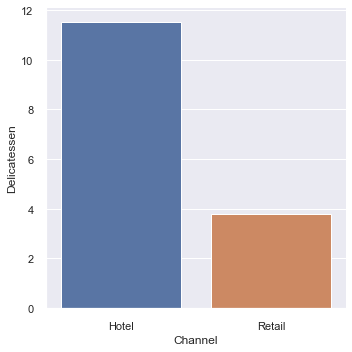

In [96]:
#A sample catplot showing Channel with the Item Delicatessen for skewness
sns.catplot(x='Channel',y='Delicatessen',data=df_wc_channel_skew,kind='bar')

In [24]:
df_wc_region_max = df_wc_region.groupby(['Region']).max().reset_index()
df_wc_region_max

,Region,Milk,Fresh,Grocery,Frozen,Detergents_Paper,Delicatessen
0,Lisbon,28326,56083,39694,18711,19410,6854
1,Oporto,25071,32717,67298,60869,38102,5609
2,Other,73498,112151,92780,36534,40827,47943


In [25]:
df_wc_region_min = df_wc_region.groupby(['Region']).min().reset_index()
df_wc_region_min

,Region,Milk,Fresh,Grocery,Frozen,Detergents_Paper,Delicatessen
0,Lisbon,258,18,489,61,5,7
1,Oporto,333,3,1330,131,15,51
2,Other,55,3,3,25,3,3


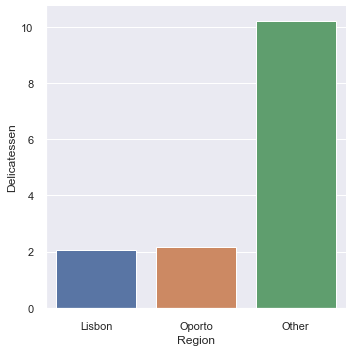

In [95]:
#A sample catplot showing Region with the Item Delicatessen for skewness
sns.catplot(x='Region',y='Delicatessen',data=df_wc_region_skew,kind='bar')

In [27]:
df_wc_channel.groupby(['Channel'],axis=0).describe(include='all')

Milk                                                              \
         count          mean          std    min     25%     50%       75%   
Channel                                                                      
Hotel    298.0   3451.724832  4352.165571   55.0  1164.5  2157.0   4029.50   
Retail   142.0  10716.500000  9679.631351  928.0  5938.0  7812.0  12162.75   

                  Fresh                ... Detergents_Paper           \
             max  count          mean  ...              75%      max   
Channel                                ...                             
Hotel    43950.0  298.0  13475.560403  ...            899.5   6907.0   
Retail   73498.0  142.0   8904.323944  ...           8662.5  40827.0   

        Delicatessen                                                         \
               count         mean          std  min     25%     50%     75%   
Channel                                                                       
Hotel          298.0  1415.956376  3147.426922  3.0  379.00   821.0  1548.0   
Retail         142.0  1753.436620  1953.797047  3.0  566.75  1350.0  2156.0   

                  
             max  
Channel           
Hotel    47943.0  
Retail   16523.0  

[2 rows x 48 columns]

In [28]:
df_wc_region.groupby(['Region'],axis=0).describe(include='all')

Milk                                                            \
        count         mean          std    min     25%     50%      75%   
Region                                                                    
Lisbon   77.0  5486.415584  5704.856079  258.0  1372.0  3748.0  7503.00   
Oporto   47.0  5088.170213  5826.343145  333.0  1430.5  2374.0  5772.50   
Other   316.0  5977.085443  7935.463443   55.0  1634.0  3684.5  7198.75   

                 Fresh                ... Detergents_Paper           \
            max  count          mean  ...              75%      max   
Region                                ...                             
Lisbon  28326.0   77.0  11101.727273  ...          3593.00  19410.0   
Oporto  25071.0   47.0   9887.680851  ...          4324.50  38102.0   
Other   73498.0  316.0  12533.471519  ...          3875.75  40827.0   

       Delicatessen                                                         \
              count         mean          std   min    25%    50%      75%   
Region                                                                       
Lisbon         77.0  1354.896104  1345.423340   7.0  548.0  806.0  1775.00   
Oporto         47.0  1159.702128  1050.739841  51.0  540.5  898.0  1538.50   
Other         316.0  1620.601266  3232.581660   3.0  402.0  994.0  1832.75   

                 
            max  
Region           
Lisbon   6854.0  
Oporto   5609.0  
Other   47943.0  

[3 rows x 48 columns]

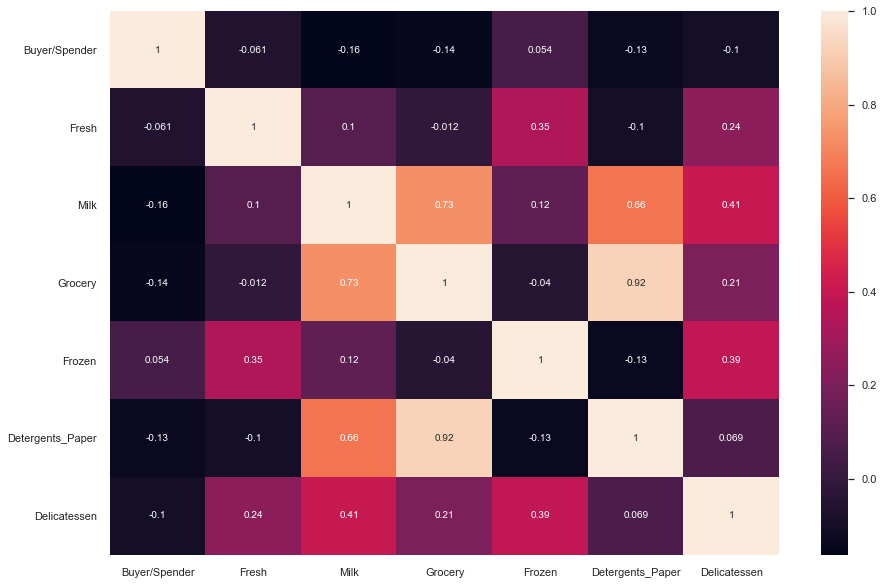

In [98]:
#Correrlation Heatmap shows the correlation on all the items
fig_size_alter = (15, 10)
fig , ax = plt.subplots(figsize=fig_size_alter)
correlation = df_wc.corr()
sns.heatmap(correlation, annot=True,ax=ax)

1.3. On the basis of the descriptive measure of variability, which item shows the most inconsistent behaviour? Which items shows the least inconsistent behaviour?

In [30]:
varieties_of_products = df_wc[['Milk','Fresh','Grocery','Frozen','Detergents_Paper','Delicatessen']]

In [31]:
#vop_cov gives infomation on coefficient of variation which lets us know about the inconsistency of data.
vop_mean = varieties_of_products.mean().sort_values(ascending=False)
vop_std = varieties_of_products.std().sort_values(ascending=False)
vop_cov = (vop_std / vop_mean)
(vop_cov*100).sort_values(ascending=False).round(2)

Delicatessen        184.94
Detergents_Paper    165.46
Frozen              158.03
Milk                127.33
Grocery             119.52
Fresh               105.39
dtype: float64

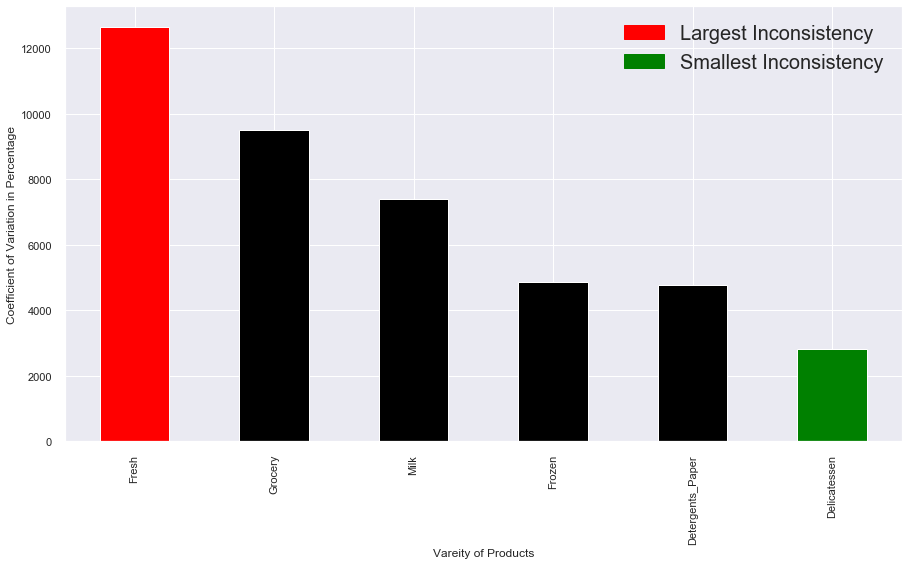

In [99]:
#Graph showing us insights on the inconsistency of items in the data
fig_size_alter = (15, 8)
fig , ax = plt.subplots(figsize=fig_size_alter)
varieties_of_products = df_wc.iloc[:,3:9]
vop_cov = ((varieties_of_products.std()/varieties_of_products.mean()*100).sort_values(ascending=False))
color = ["black"] * len(vop_cov)
color[0] = "red"
color[-1] = "green"
vop_cov_df = pd.DataFrame(vop_cov).reset_index()
vop_cov_df.columns = ['Vareity of Products','Standard Deviation']
vop_std.plot(kind='bar',color=color,ax=ax)
largest_inconsistency = mpatches.Patch(color='red', label='Largest Inconsistency')
smallest_inconsistency = mpatches.Patch(color='green', label='Smallest Inconsistency')
plt.xlabel('Vareity of Products')
plt.ylabel('Coefficient of Variation in Percentage')
plt.legend(handles=[largest_inconsistency, smallest_inconsistency], prop={'size': 20})

1.4. Are there any outliers in the data?

In [33]:
#Boxplot generally shows the outliers in the data
fig_size_alter = (15, 8)
fig , ax = plt.subplots(figsize=fig_size_alter)
sns.boxplot(data=varieties_of_products,orient='h',ax=ax).set(title = 'Outliers for all the ITEMS')

[Text(0.5, 1.0, 'Outliers for all the ITEMS')]

# Problem 2 Solutions

Data Loading and Exploration:

In [34]:
df_Survey=pd.read_csv('survey-1.csv')

Data Profiling:

In [35]:
ProfileReport(df_Survey)

C:\Users\z024333\Documents\Anaconda_GreatLearning\lib\site-packages\pandas_profiling\describe.py:392: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  variable_stats = pd.concat(ldesc, join_axes=pd.Index([names]), axis=1)


Number of variables,14
Number of observations,62
Total Missing (%),0.0%
Total size in memory,6.9 KiB
Average record size in memory,114.1 B
Numeric,8
Categorical,6
Boolean,0
Date,0
Text (Unique),0
Rejected,0


In [36]:
#Top 10 rows for checking the data
df_Survey.head(10)

,ID,Gender,Age,Class,Major,Grad Intention,GPA,Employment,Salary,Social Networking,Satisfaction,Spending,Computer,Text Messages
0,1,Female,20,Junior,Other,Yes,2.9,Full-Time,50.0,1,3,350,Laptop,200
1,2,Male,23,Senior,Management,Yes,3.6,Part-Time,25.0,1,4,360,Laptop,50
2,3,Male,21,Junior,Other,Yes,2.5,Part-Time,45.0,2,4,600,Laptop,200
3,4,Male,21,Junior,CIS,Yes,2.5,Full-Time,40.0,4,6,600,Laptop,250
4,5,Male,23,Senior,Other,Undecided,2.8,Unemployed,40.0,2,4,500,Laptop,100
5,6,Female,22,Senior,Economics/Finance,Undecided,2.3,Unemployed,78.0,3,2,700,Laptop,30
6,7,Female,21,Junior,Other,Undecided,3.0,Part-Time,50.0,1,3,500,Laptop,50
7,8,Female,22,Senior,Other,Undecided,3.1,Full-Time,80.0,1,2,200,Tablet,300
8,9,Female,20,Junior,Management,Yes,3.6,Unemployed,30.0,0,4,500,Laptop,400
9,10,Female,21,Senior,Economics/Finance,Undecided,3.3,Part-Time,37.5,1,4,200,Laptop,100


In [37]:
#To Know amount more about Datatype, count and Null Property
df_Survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 14 columns):
ID                   62 non-null int64
Gender               62 non-null object
Age                  62 non-null int64
Class                62 non-null object
Major                62 non-null object
Grad Intention       62 non-null object
GPA                  62 non-null float64
Employment           62 non-null object
Salary               62 non-null float64
Social Networking    62 non-null int64
Satisfaction         62 non-null int64
Spending             62 non-null int64
Computer             62 non-null object
Text Messages        62 non-null int64
dtypes: float64(2), int64(6), object(6)
memory usage: 6.9+ KB


In [38]:
#Null count info in all the columns
df_Survey.isnull().sum()

ID                   0
Gender               0
Age                  0
Class                0
Major                0
Grad Intention       0
GPA                  0
Employment           0
Salary               0
Social Networking    0
Satisfaction         0
Spending             0
Computer             0
Text Messages        0
dtype: int64

In [39]:
#Gives info on shape of the Dataset(rows and columns)
df_Survey.shape

(62, 14)

In [40]:
#Gives info on all the columns
df_Survey.describe(include='all')

,ID,Gender,Age,Class,Major,Grad Intention,GPA,Employment,Salary,Social Networking,Satisfaction,Spending,Computer,Text Messages
count,62.000000,62,62.000000,62,62,62,62.000000,62,62.000000,62.000000,62.000000,62.000000,62,62.000000
unique,NaN,2,NaN,3,8,3,NaN,3,NaN,NaN,NaN,NaN,3,NaN
top,NaN,Female,NaN,Senior,Retailing/Marketing,Yes,NaN,Part-Time,NaN,NaN,NaN,NaN,Laptop,NaN
freq,NaN,33,NaN,31,14,28,NaN,43,NaN,NaN,NaN,NaN,55,NaN
mean,31.500000,NaN,21.129032,NaN,NaN,NaN,3.129032,NaN,48.548387,1.516129,3.741935,482.016129,NaN,246.209677
std,18.041619,NaN,1.431311,NaN,NaN,NaN,0.377388,NaN,12.080912,0.844305,1.213793,221.953805,NaN,214.465950
min,1.000000,NaN,18.000000,NaN,NaN,NaN,2.300000,NaN,25.000000,0.000000,1.000000,100.000000,NaN,0.000000
25%,16.250000,NaN,20.000000,NaN,NaN,NaN,2.900000,NaN,40.000000,1.000000,3.000000,312.500000,NaN,100.000000
50%,31.500000,NaN,21.000000,NaN,NaN,NaN,3.150000,NaN,50.000000,1.000000,4.000000,500.000000,NaN,200.000000
75%,46.750000,NaN,22.000000,NaN,NaN,NaN,3.400000,NaN,55.000000,2.000000,4.000000,600.000000,NaN,300.000000


2.1. For this data, construct the following contingency tables (Keep Gender as row variable)

2.1.1. Gender and Major 

In [41]:
#Crosstab is the closest form of contigency tables in python. Here we show Major with Gender(as Rows)
df_s_crosstab_Major = pd.crosstab(df_Survey['Gender'], df_Survey['Major']) 
df_s_crosstab_Major

Major,Accounting,CIS,Economics/Finance,International Business,Management,Other,Retailing/Marketing,Undecided
Gender,,,,,,,,
Female,3,3,7,4,4,3,9,0
Male,4,1,4,2,6,4,5,3


2.1.2. Gender and Grad Intention 

In [42]:
#Crosstab is the closest form of contigency tables in python. Here we show Grad Intention with Gender(as Rows)
df_s_crosstab_Grad_Intention = pd.crosstab(df_Survey['Gender'], df_Survey['Grad Intention']) 
df_s_crosstab_Grad_Intention

Grad Intention,No,Undecided,Yes
Gender,,,
Female,9,13,11
Male,3,9,17


2.1.3. Gender and Employment

In [43]:
#Crosstab is the closest form of contigency tables in python. Here we show Employment with Gender(as Rows)
df_s_crosstab_Employment = pd.crosstab(df_Survey['Gender'], df_Survey['Employment']) 
df_s_crosstab_Employment

Employment,Full-Time,Part-Time,Unemployed
Gender,,,
Female,3,24,6
Male,7,19,3


 2.1.4. Gender and Computer

In [44]:
#Crosstab is the closest form of contigency tables in python. Here we show Computer with Gender(as Rows)
df_s_crosstab_Computer = pd.crosstab(df_Survey['Gender'], df_Survey['Computer']) 
df_s_crosstab_Computer

Computer,Desktop,Laptop,Tablet
Gender,,,
Female,2,29,2
Male,3,26,0


2.2.1. Assume that the sample is a representative of the population of CMSU. Based on the data, answer the following question: What is the probability that a randomly selected CMSU student will be male? What is the probability that a randomly selected CMSU student will be female?

In [45]:
#Here we have Basic count of all the Male and Female in the Data
df_s_gender= df_Survey.groupby(['Gender']).size().reset_index(name='count')
df_s_gender

,Gender,count
0,Female,33
1,Male,29


In [46]:
#Percentage of Male and Female in the Survey
Total_Gender = df_Survey['Gender'].count()
Total_Male = df_s_gender.iloc[1,-1]
Total_Female = df_s_gender.iloc[0,-1]
Male_percent = Total_Male / Total_Gender
Female_percent = Total_Female / Total_Gender
print(Total_Male,Total_Gender,sep ="/")
print(Total_Female,Total_Gender,sep ="/")
print("Percentage of Male students is",Male_percent.round(2)*100)
print("Percentage of Female students is",Female_percent.round(2)*100)

29/62
33/62
Percentage of Male students is 47.0
Percentage of Female students is 53.0


2.2.2. Assume that the sample is a representative of the population of CMSU. Based on the data, answer the following question: Find the conditional probability of different majors among the male students in CMSU. Find the conditional probability of different majors among the female students of CMSU.

In [47]:
#First step is the find countof all the Majors
df_Survey["Major"].value_counts()

Retailing/Marketing       14
Economics/Finance         11
Management                10
Other                      7
Accounting                 7
International Business     6
CIS                        4
Undecided                  3
Name: Major, dtype: int64

In [48]:
#Next to find the total genders in each Major
df_survey_total_Major = pd.DataFrame(df_Survey.groupby('Major')['Gender'].size().reset_index(name='Total_Gender'))
df_survey_total_Major

,Major,Total_Gender
0,Accounting,7
1,CIS,4
2,Economics/Finance,11
3,International Business,6
4,Management,10
5,Other,7
6,Retailing/Marketing,14
7,Undecided,3


In [49]:
#Next step is to find a based on individual gender and adding total count of each gender for calculation
df_survey_Major_on_Gender = pd.crosstab(df_Survey['Major'], df_Survey['Gender']).reset_index()
df_survey_Major_on_Gender
df_survey_Major_on_Gender['Total_Male']=df_survey_Major_on_Gender.apply(lambda row: int(29),axis=1)
df_survey_Major_on_Gender['Total_Female']=df_survey_Major_on_Gender.apply(lambda row: int(33),axis=1)
df_survey_Major_on_Gender

Gender,Major,Female,Male,Total_Male,Total_Female
0,Accounting,3,4,29,33
1,CIS,3,1,29,33
2,Economics/Finance,7,4,29,33
3,International Business,4,2,29,33
4,Management,4,6,29,33
5,Other,3,4,29,33
6,Retailing/Marketing,9,5,29,33
7,Undecided,0,3,29,33


In [50]:
#This Step is where the condidtional Probabily is applied dividing individual gender couunt with total Gender in percentage
Conditional_Prob_male_Female_M = df_survey_Major_on_Gender.merge(df_survey_total_Major, on='Major', how='left')
Conditional_Prob_male_Female_M['P(Major|Male) in percentage'] = Conditional_Prob_male_Female_M.apply(lambda row: round((row.Male / row.Total_Male)*100,2), axis = 1)
Conditional_Prob_male_Female_M['P(Major|Female) in percentage'] = Conditional_Prob_male_Female_M.apply(lambda row: round((row.Female / row.Total_Female)*100,2), axis = 1)
Conditional_Prob_male_Female_M

,Major,Female,Male,Total_Male,Total_Female,Total_Gender,P(Major|Male) in percentage,P(Major|Female) in percentage
0,Accounting,3,4,29,33,7,13.79,9.09
1,CIS,3,1,29,33,4,3.45,9.09
2,Economics/Finance,7,4,29,33,11,13.79,21.21
3,International Business,4,2,29,33,6,6.90,12.12
4,Management,4,6,29,33,10,20.69,12.12
5,Other,3,4,29,33,7,13.79,9.09
6,Retailing/Marketing,9,5,29,33,14,17.24,27.27
7,Undecided,0,3,29,33,3,10.34,0.00


In [51]:
#just a little addon to highlight the results
def highlight_column(s):
    color = 'yellow'
    return 'background-color: %s' % color

In [52]:
#Final Result
Conditional_Prob_male_Female_M.style.applymap(highlight_column, subset=pd.IndexSlice[:, ['P(Major|Male) in percentage','P(Major|Female) in percentage']])

,Major,Female,Male,Total_Male,Total_Female,Total_Gender,P(Major|Male) in percentage,P(Major|Female) in percentage
0,Accounting,3,4,29,33,7,13.79,9.09
1,CIS,3,1,29,33,4,3.45,9.09
2,Economics/Finance,7,4,29,33,11,13.79,21.21
3,International Business,4,2,29,33,6,6.9,12.12
4,Management,4,6,29,33,10,20.69,12.12
5,Other,3,4,29,33,7,13.79,9.09
6,Retailing/Marketing,9,5,29,33,14,17.24,27.27
7,Undecided,0,3,29,33,3,10.34,0


2.2.3. Assume that the sample is a representative of the population of CMSU. Based on the data, answer the following question: Find the conditional probability of intent to graduate, given that the student is a male. Find the conditional probability of intent to graduate, given that the student is a female.

In [53]:
#First step is the find count of all the Grad Intention
df_Survey["Grad Intention"].value_counts()

Yes          28
Undecided    22
No           12
Name: Grad Intention, dtype: int64

In [54]:
#Next to find the total genders in each Grad Intention
df_survey_total_GI = pd.DataFrame(df_Survey.groupby('Grad Intention')['Gender'].size().reset_index(name='Total_Gender'))
df_survey_total_GI


,Grad Intention,Total_Gender
0,No,12
1,Undecided,22
2,Yes,28


In [55]:
#Next step is to find a based on individual gender and adding total count of each gender for calculation
df_survey_GI_on_Gender = pd.crosstab(df_Survey['Grad Intention'], df_Survey['Gender']).reset_index()
df_survey_GI_on_Gender
df_survey_GI_on_Gender['Total_Male']=df_survey_GI_on_Gender.apply(lambda row: int(29),axis=1)
df_survey_GI_on_Gender['Total_Female']=df_survey_GI_on_Gender.apply(lambda row: int(33),axis=1)
df_survey_GI_on_Gender

Gender,Grad Intention,Female,Male,Total_Male,Total_Female
0,No,9,3,29,33
1,Undecided,13,9,29,33
2,Yes,11,17,29,33


In [56]:
#This Step is where the condidtional Probabily is applied dividing individual gender couunt with total Gender in percentage
Conditional_Prob_male_Female_GI = df_survey_GI_on_Gender.merge(df_survey_total_GI, on='Grad Intention', how='left')
Conditional_Prob_male_Female_GI['P(Grad Intention|Male) in percentage'] = Conditional_Prob_male_Female_GI.apply(lambda row: round((row.Male / row.Total_Male)*100,2), axis = 1)
Conditional_Prob_male_Female_GI['P(Grad Intention|Female) in percentage'] = Conditional_Prob_male_Female_GI.apply(lambda row: round((row.Female / row.Total_Female)*100,2), axis = 1)
Conditional_Prob_male_Female_GI

,Grad Intention,Female,Male,Total_Male,Total_Female,Total_Gender,P(Grad Intention|Male) in percentage,P(Grad Intention|Female) in percentage
0,No,9,3,29,33,12,10.34,27.27
1,Undecided,13,9,29,33,22,31.03,39.39
2,Yes,11,17,29,33,28,58.62,33.33


In [57]:
#Final Result
Conditional_Prob_male_Female_GI.style.applymap(highlight_column, subset=pd.IndexSlice[:, ['P(Grad Intention|Male) in percentage','P(Grad Intention|Female) in percentage']])

,Grad Intention,Female,Male,Total_Male,Total_Female,Total_Gender,P(Grad Intention|Male) in percentage,P(Grad Intention|Female) in percentage
0,No,9,3,29,33,12,10.34,27.27
1,Undecided,13,9,29,33,22,31.03,39.39
2,Yes,11,17,29,33,28,58.62,33.33


2.2.4. Assume that the sample is a representative of the population of CMSU. Based on the data, answer the following question: Find the conditional probability of employment status for the male students as well as for the female students.

In [58]:
#First step is the find count of all the Employment
df_Survey["Employment"].value_counts()

Part-Time     43
Full-Time     10
Unemployed     9
Name: Employment, dtype: int64

In [59]:
#Next to find the total genders in each Employment
df_survey_total_E = pd.DataFrame(df_Survey.groupby('Employment')['Gender'].size().reset_index(name='Total_Gender'))
df_survey_total_E

,Employment,Total_Gender
0,Full-Time,10
1,Part-Time,43
2,Unemployed,9


In [60]:
#Next step is to find a based on individual gender and adding total count of each gender for calculation
df_survey_E_on_Gender = pd.crosstab(df_Survey['Employment'], df_Survey['Gender']).reset_index()
df_survey_E_on_Gender['Total_Male']=df_survey_E_on_Gender.apply(lambda row: int(29),axis=1)
df_survey_E_on_Gender['Total_Female']=df_survey_E_on_Gender.apply(lambda row: int(33),axis=1)
df_survey_E_on_Gender

Gender,Employment,Female,Male,Total_Male,Total_Female
0,Full-Time,3,7,29,33
1,Part-Time,24,19,29,33
2,Unemployed,6,3,29,33


In [61]:
#This Step is where the condidtional Probabily is applied dividing individual gender couunt with total Gender in percentage
Conditional_Prob_male_Female_E = df_survey_E_on_Gender.merge(df_survey_total_E, on='Employment', how='left')
Conditional_Prob_male_Female_E['P(Employment|Male) in percentage'] = Conditional_Prob_male_Female_E.apply(lambda row: round((row.Male / row.Total_Male)*100,2), axis = 1)
Conditional_Prob_male_Female_E['P(Employment|Female) in percentage'] = Conditional_Prob_male_Female_E.apply(lambda row: round((row.Female / row.Total_Female)*100,2), axis = 1)
Conditional_Prob_male_Female_E

,Employment,Female,Male,Total_Male,Total_Female,Total_Gender,P(Employment|Male) in percentage,P(Employment|Female) in percentage
0,Full-Time,3,7,29,33,10,24.14,9.09
1,Part-Time,24,19,29,33,43,65.52,72.73
2,Unemployed,6,3,29,33,9,10.34,18.18


In [62]:
#Final Result
Conditional_Prob_male_Female_E.style.applymap(highlight_column, subset=pd.IndexSlice[:, ['P(Employment|Male) in percentage','P(Employment|Female) in percentage']])

,Employment,Female,Male,Total_Male,Total_Female,Total_Gender,P(Employment|Male) in percentage,P(Employment|Female) in percentage
0,Full-Time,3,7,29,33,10,24.14,9.09
1,Part-Time,24,19,29,33,43,65.52,72.73
2,Unemployed,6,3,29,33,9,10.34,18.18


2.2.5. Assume that the sample is a representative of the population of CMSU. Based on the data, answer the following question: Find the conditional probability of laptop preference among the male students as well as among the female students.

In [63]:
#First step is the find count of all the Computer
df_Survey["Computer"].value_counts()

Laptop     55
Desktop     5
Tablet      2
Name: Computer, dtype: int64

In [64]:
#Next to find the total genders in each Computer
df_survey_total_C = pd.DataFrame(df_Survey.groupby('Computer')['Gender'].size().reset_index(name='Total_Gender'))
df_survey_total_C

,Computer,Total_Gender
0,Desktop,5
1,Laptop,55
2,Tablet,2


In [65]:
#Next step is to find a based on individual gender and adding total count of each gender for calculation
df_survey_C_on_Gender = pd.crosstab(df_Survey['Computer'], df_Survey['Gender']).reset_index()
df_survey_C_on_Gender['Total_Male']=df_survey_C_on_Gender.apply(lambda row: int(29),axis=1)
df_survey_C_on_Gender['Total_Female']=df_survey_C_on_Gender.apply(lambda row: int(33),axis=1)
df_survey_C_on_Gender

Gender,Computer,Female,Male,Total_Male,Total_Female
0,Desktop,2,3,29,33
1,Laptop,29,26,29,33
2,Tablet,2,0,29,33


In [66]:
#This Step is where the condidtional Probabily is applied dividing individual gender couunt with total Gender in percentage
Conditional_Prob_male_Female_C = df_survey_C_on_Gender.merge(df_survey_total_C, on='Computer', how='left')
Conditional_Prob_male_Female_C['P(Computer|Male) in percentage'] = Conditional_Prob_male_Female_C.apply(lambda row: round((row.Male / row.Total_Male)*100,2), axis = 1)
Conditional_Prob_male_Female_C['P(Computer|Female) in percentage'] = Conditional_Prob_male_Female_C.apply(lambda row: round((row.Female / row.Total_Female)*100,2), axis = 1)
Conditional_Prob_male_Female_C

,Computer,Female,Male,Total_Male,Total_Female,Total_Gender,P(Computer|Male) in percentage,P(Computer|Female) in percentage
0,Desktop,2,3,29,33,5,10.34,6.06
1,Laptop,29,26,29,33,55,89.66,87.88
2,Tablet,2,0,29,33,2,0.00,6.06


In [67]:
#Final Result
Conditional_Prob_male_Female_C.style.applymap(highlight_column, subset=pd.IndexSlice[:, ['P(Computer|Male) in percentage','P(Computer|Female) in percentage']])

,Computer,Female,Male,Total_Male,Total_Female,Total_Gender,P(Computer|Male) in percentage,P(Computer|Female) in percentage
0,Desktop,2,3,29,33,5,10.34,6.06
1,Laptop,29,26,29,33,55,89.66,87.88
2,Tablet,2,0,29,33,2,0,6.06


2.4. Note that there are three numerical (continuous) variables in the data set, Salary, Spending and Text Messages. For each of them comment whether they follow a normal distribution. Write a note summarizing your conclusions. [Recall that symmetric histogram does not necessarily mean that the underlying distribution is symmetric]

In [68]:
#Just taking a look on the correlation matrix ans we cant see any strong correlation anywhere(positive or negative)
df_Survey.corr()

,ID,Age,GPA,Salary,Social Networking,Satisfaction,Spending,Text Messages
ID,1.000000,-0.075545,0.102328,-0.051484,-0.118383,-0.039676,-0.046230,0.138066
Age,-0.075545,1.000000,0.029370,-0.015536,0.011815,-0.046572,0.032968,-0.227753
GPA,0.102328,0.029370,1.000000,-0.308643,-0.197002,0.038097,-0.343403,0.042195
Salary,-0.051484,-0.015536,-0.308643,1.000000,0.017601,-0.197013,0.003402,-0.073640
Social Networking,-0.118383,0.011815,-0.197002,0.017601,1.000000,0.020125,0.073088,0.020940
Satisfaction,-0.039676,-0.046572,0.038097,-0.197013,0.020125,1.000000,0.090500,0.177548
Spending,-0.046230,0.032968,-0.343403,0.003402,0.073088,0.090500,1.000000,0.028489
Text Messages,0.138066,-0.227753,0.042195,-0.073640,0.020940,0.177548,0.028489,1.000000


In [69]:
#Describing all the three columns under questioning 
df_Survey[["Salary","Spending","Text Messages"]].describe()

,Salary,Spending,Text Messages
count,62.000000,62.000000,62.000000
mean,48.548387,482.016129,246.209677
std,12.080912,221.953805,214.465950
min,25.000000,100.000000,0.000000
25%,40.000000,312.500000,100.000000
50%,50.000000,500.000000,200.000000
75%,55.000000,600.000000,300.000000
max,80.000000,1400.000000,900.000000


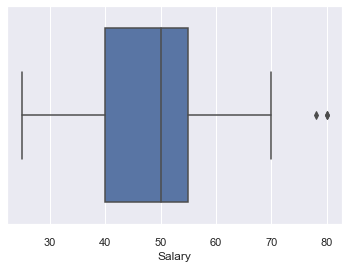

In [103]:
# checking for normal distribution from boxplots
sns.boxplot(df_Survey["Salary"]);

Figure(432x288)
The Skewness of Salary is 0.5347008436225946 - Right Skewed


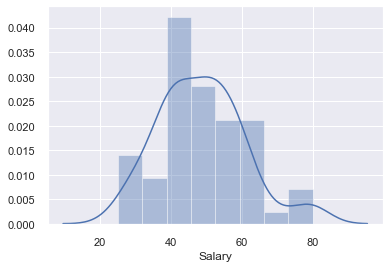

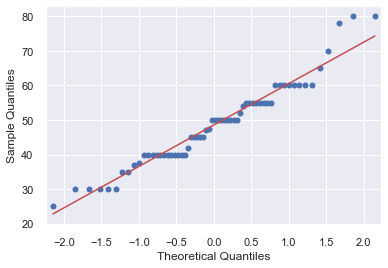

In [101]:
#Checking for skewness, qqplot and Distplot to see if the column is normally distributed
sns.distplot(df_Survey["Salary"])
print(sm.qqplot(df_Survey["Salary"], line='s'))
print("The Skewness of Salary is",df_Survey["Salary"].skew(),'- Right Skewed')

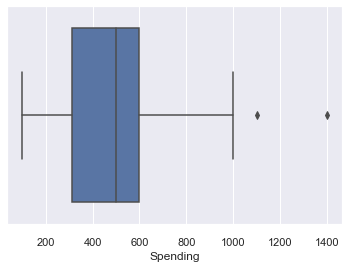

In [104]:
# checking for normal distribution from boxplots
sns.boxplot(df_Survey["Spending"]);

Figure(432x288)
The Skewness of Spending is 1.5859147414045331 - Right Skewed


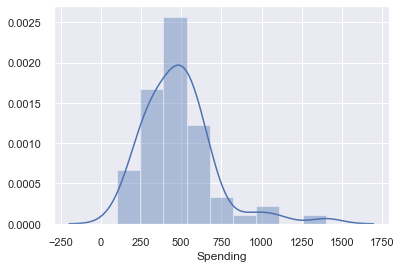

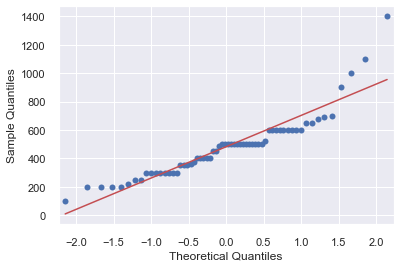

In [105]:
#Checking for skewness, qqplot and Distplot to see if the column is normally distributed
sns.distplot(df_Survey["Spending"]);
print(sm.qqplot(df_Survey["Spending"], line='s'))
print("The Skewness of Spending is",df_Survey["Spending"].skew(),'- Right Skewed')

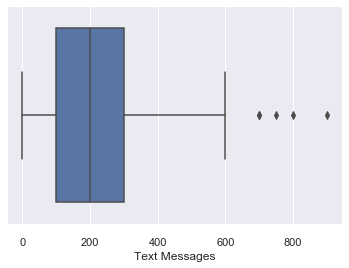

In [102]:
# checking for normal distribution from boxplots
sns.boxplot(df_Survey["Text Messages"])

Figure(432x288)
The Skewness of Text Messages is 1.2958079731054333 - Right Skewed


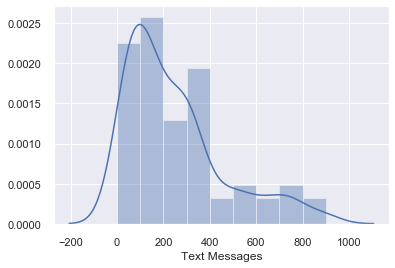

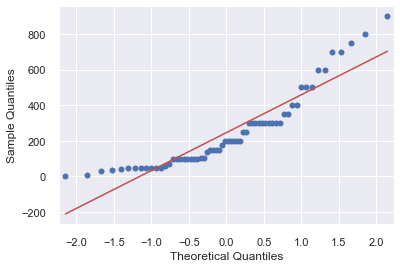

In [100]:
#Checking for skewness, qqplot and Distplot to see if the column is normally distributed
sns.distplot(df_Survey["Text Messages"])
print(sm.qqplot(df_Survey["Text Messages"], line='s'))
print("The Skewness of Text Messages is",df_Survey["Text Messages"].skew(),'- Right Skewed')

# Problem 3 Solutions

Data Loading and Exploration:

In [76]:
df_AB= pd.read_csv('A & B shingles-1.csv')

Data Profiling:

In [77]:
ProfileReport(df_AB)

C:\Users\z024333\Documents\Anaconda_GreatLearning\lib\site-packages\pandas_profiling\describe.py:392: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  variable_stats = pd.concat(ldesc, join_axes=pd.Index([names]), axis=1)


Number of variables,2
Number of observations,36
Total Missing (%),6.9%
Total size in memory,704.0 B
Average record size in memory,19.6 B
Numeric,2
Categorical,0
Boolean,0
Date,0
Text (Unique),0
Rejected,0


In [78]:
#Top 5 rows for checking the data
df_AB.head()

,A,B
0,0.44,0.14
1,0.61,0.15
2,0.47,0.31
3,0.30,0.16
4,0.15,0.37


In [79]:
#To know further information about the data including 5 data information
df_AB.describe()

,A,B
count,36.000000,31.000000
mean,0.316667,0.273548
std,0.135731,0.137296
min,0.130000,0.100000
25%,0.207500,0.160000
50%,0.290000,0.230000
75%,0.392500,0.400000
max,0.720000,0.580000


In [80]:
#checking the number of null in each column
df_AB.isnull().sum()

A    0
B    5
dtype: int64

In [81]:
#To Know amount more about Datatype and count
df_AB.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 2 columns):
A    36 non-null float64
B    31 non-null float64
dtypes: float64(2)
memory usage: 704.0 bytes


In [82]:
#To Know amount more about Null Property
df_AB_null = df_AB['A'].isnull().sum()
df_AB_null = pd.Series(data=df_AB['A'].isnull().sum())
df_AB_null = pd.DataFrame(df_AB_null)
df_AB_null['Total Null for B'] = df_AB['B'].isnull().sum()
df_AB_null['Total Null for A'] = df_AB['A'].isnull().sum()
df_AB_null = df_AB_null.drop([0],axis=1)
df_AB_null

,Total Null for B,Total Null for A
0,5,0


In [83]:
df_AB_Mean_A = df_AB['A'].mean()
df_AB_Mean_B = df_AB['B'].mean()
df_AB_std_A = df_AB['A'].std()
df_AB_std_B = df_AB['B'].std()

print("Mean of column A is ",df_AB_Mean_A)
print("Mean of column B is ",df_AB_Mean_B)
print("STD of column A is ",df_AB_std_A)
print("STD of column B is ",df_AB_std_B)

Mean of column A is  0.3166666666666666
Mean of column B is  0.2735483870967742
STD of column A is  0.13573082605973166
STD of column B is  0.13729647694185443


In [84]:
#Performing one sample T test on Column A with H0<=0.35 and HA>0.35, also with alpha = 0.05
t_statistic , p_value = ttest_1samp(df_AB['A'],0.35,nan_policy='omit')
print("P-Value:{0} T-Statistic:{1}".format(p_value/2,t_statistic))
#From the result we can state that we fail to reject the Null Hypothesis to say that moisture is lesser than or equal to 0.35 pound per 100 square feet.

P-Value:0.07477633144907513 T-Statistic:-1.4735046253382782


In [85]:
#Performing one sample T test on Column B with H0<=0.35 and HA>0.35, also with alpha = 0.05
t_statistic , p_value = ttest_1samp(df_AB['B'],0.35,nan_policy='omit')
print("P-Value:{0} T-Statistic:{1}".format(p_value/2,t_statistic))
#From the result we can state that we reject the Null Hypothesis to say that moisture is greater than  0.35 pound per 100 square feet.

P-Value:0.0020904774003191826 T-Statistic:-3.1003313069986995


3.1 Do you think that the population means for shingles A and B are equal? Form the hypothesis and conduct the test of the hypothesis. What assumption do you need to check before the test for equality of means is performed?

and

3.2. What assumption about the population distribution is needed in order to conduct the hypothesis tests above?

In [86]:
#Performing two sample T test on Column A and B with H0 =(μA = μB)  and HA =(μA ≠ μB), also with alpha = 0.05
t_statistic, p_value = ttest_ind(df_AB['A'],df_AB['B'],nan_policy = 'omit')
print('T_statistic=%.3f,P_value=%.3f' % (t_statistic, p_value))
#From the result we can state that we fail to reject the NULL hypothesis and therefore we can conclude that Mean values of column ‘A’ and ‘B’ are equal.

T_statistic=1.290,P_value=0.202


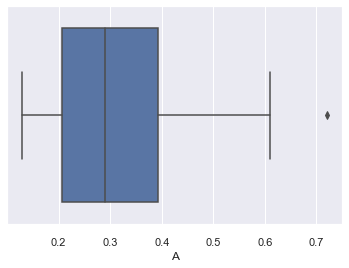

In [106]:
# checking for normal distribution from boxplots
sns.boxplot(df_AB['A'])

In [88]:
#Test to see if the two columns are independent of each other
mannwhitneyu(df_AB['A'],df_AB['B'])

MannwhitneyuResult(statistic=631.0, pvalue=0.4262588440767592)

The Skewness of Text Messages is 0.9506185720492205 - Right Skewed


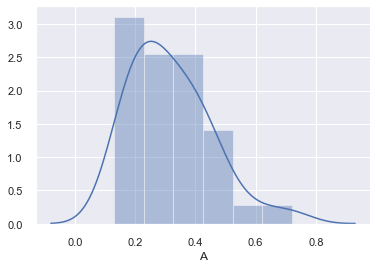

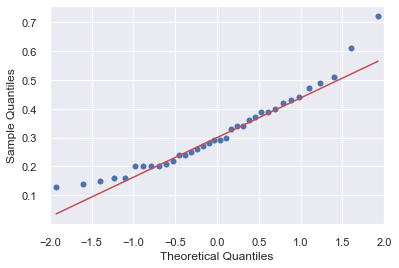

In [108]:
#Checking for skewness, qqplot and Distplot to see if the column is normally distributed
print("The Skewness of Text Messages is",df_AB['A'].skew(),'- Right Skewed')
sns.distplot(df_AB['A'])
sm.qqplot(df_AB['A'],line='q') 
plt.show()

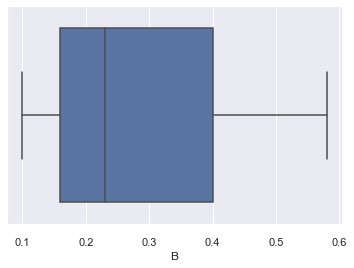

In [109]:
#Checking for skewness, qqplot and Distplot to see if the column is normally distributed
sns.boxplot(df_AB['B'])

The Skewness of Text Messages is 0.5134239595793691 - Right Skewed


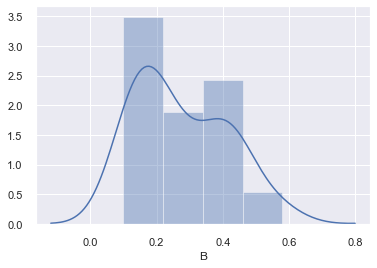

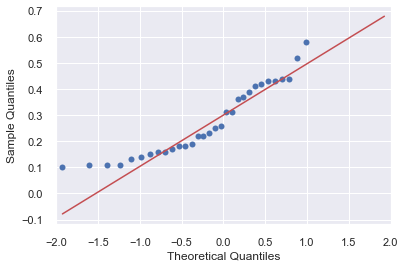

In [110]:
#Checking for skewness, qqplot and Distplot to see if the column is normally distributed
print("The Skewness of Text Messages is",df_AB['B'].skew(),'- Right Skewed')
sns.distplot(df_AB['B'])
sm.qqplot(df_AB['B'],line='q') 
plt.show() 